In [31]:

"""Generate sentiment analysis data."""
import numpy as np

VOCAB = ["good", "bad", "uh"]


def gen_gbu(nobs=1000):
    """Generate good/bad/uh data."""
    data = []
    sentiments = []
    for _ in range(nobs):
        num_positions = np.random.randint(5, 20)
        words = np.random.choice(
            VOCAB,
            num_positions,
            p=np.random.dirichlet([0.2, 0.2, 0.2])
        )
        sentiments.append(np.sum(words == "good") - np.sum(words == "bad"))
        data.append(list(words))
    return data, sentiments



"""Test GBU data."""
X, Y = gen_gbu()
print(X)
print(Y)

[['bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad'], ['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad'], ['good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'bad', 'good'], ['uh', 'bad', 'bad', 'uh', 'bad', 'uh', 'bad', 'uh', 'uh'], ['uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh'], ['good', 'good', 'good', 'uh', 'good', 'good', 'good', 'uh', 'good', 'good', 'uh', 'uh', 'good', 'uh'], ['good', 'bad', 'uh', 'bad', 'bad', 'bad'], ['bad', 'bad', 'good', 'bad', 'good', 'good', 'good'], ['bad', 'bad', 'bad', 'bad', 'uh', 'bad', 'bad'], ['uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh', 'uh'], ['good', 'good', 'good', 'good', 'good'], ['bad', 'uh', 'uh', 'bad', 'bad'], ['good', 'good', 'good', 'uh', 'bad', 'good', 'good', 'uh', 'good', 'good', 'good', 'uh', 'uh', 'uh', 'u

In [32]:
# creating rnn model
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class SingleRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(SingleRNN, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(n_inputs, n_neurons, bias=False))
        self.layers.append(nn.Linear(1,1,bias=False))

    def forward(self, X):
        self.Y = torch.FloatTensor([0])
        for i in range(len(X)):
            self.Y = self.layers[0](X[i]) + self.layers[1](self.Y)

        return self.Y


# pre-processing data to one hot encoding
def wordToIndex(word):
    return VOCAB.index(word)

def wordToTensor(word):
    one_hot = np.zeros(len(VOCAB))
    one_hot[wordToIndex(word)] = 1
    return one_hot

input_x = []
X_tens = []
Y_tens = torch.FloatTensor(Y)
for i in range(len(X)):
    sentence = []
    for j in range(len(X[i])):
        sentence.append(wordToTensor(X[i][j]))
    input_x.append(sentence)
    sentence = torch.FloatTensor(sentence)
    X_tens.append(sentence)


In [33]:
# training model and predicting output
rnn_model = SingleRNN(3,1)
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn_model.parameters())

num_epochs = 30
loss_curve = []
accuracy_curve = []
for _ in range(num_epochs):
    temp_loss = 0
    temp_pred = []
    for i in range(len(X_tens)):
        optimizer.zero_grad()
        pred = rnn_model(X_tens[i])
        loss = criterion(pred, torch.FloatTensor([Y_tens[i]]))
        temp_loss += loss.item()
        temp_pred.append(pred)
        loss.backward()
        optimizer.step()
    loss_curve.append(temp_loss/len(X))
    temp_pred = [round(y_pred.item()) for y_pred in  temp_pred]
    y_corr = np.array(np.array(Y) == np.array(temp_pred))
    accuracy_curve.append(y_corr.mean()*100.0)

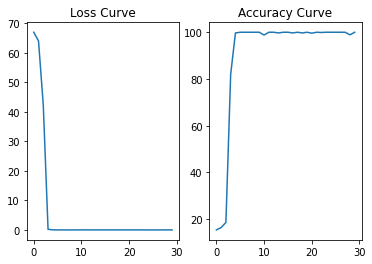

Predicted accuracv using model built using PyTorch:  100.0


In [34]:
# Plotting loss and accuracy curves
epoch_array = [i for i in range(num_epochs)]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(epoch_array, loss_curve)
ax1.set_title('Loss Curve')
ax2.plot(epoch_array, accuracy_curve)
ax2.set_title('Accuracy Curve')
plt.show()
print('Predicted accuracv using model built using PyTorch: ', accuracy_curve[-1])

In [35]:
# Weights learnt
learnt_weights = []
for weights in rnn_model.parameters():
    learnt_weights.append(weights.data.numpy())

# Recurrent neural network using learnt weights
Y_np = np.array(Y)
pred_output = []
for sentence in input_x:
    sentence = np.array(sentence)
    temp_pred = 0
    for word in sentence:
       temp_pred = np.dot(learnt_weights[0], word) + np.dot(learnt_weights[1], temp_pred)
    pred_output.append(round(temp_pred[0][0]))


pred_accuracy = (Y_np==pred_output).mean()*100
print('Predicted accuracv using model built from scratch: ', pred_accuracy)

Predicted accuracv using model built from scratch:  100.0
